In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
import os

# List the contents of the downloaded dataset directory
path = '../data/raw/'
print(os.listdir(path))

['housing.csv']


In [3]:
df = pd.read_csv(os.path.join(path, 'housing.csv'))
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [5]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

---

# Feature Exploration
***Understanding about each feature***

---

### Median Income

In [6]:
feature = "median_income"

# Baics Info
df[feature].dtype, df[feature].isna().sum()

(dtype('float64'), np.int64(0))

In [7]:
# Statistical Info
df[feature].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

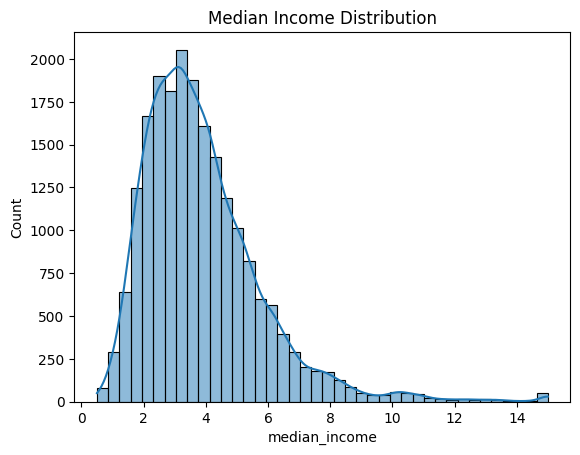

In [8]:
# Disrtibution Plot
sns.histplot(df[feature], bins=40, kde=True)
plt.title("Median Income Distribution")
plt.show()

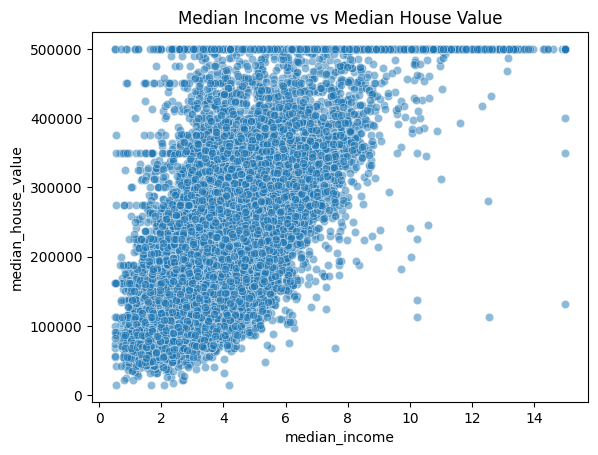

In [9]:
# Relation with Target
sns.scatterplot(x=df[feature],
                y=df['median_house_value'],
                alpha=0.5)
plt.title("Median Income vs Median House Value")
plt.show()

In [10]:
df[[feature, "median_house_value"]].corr()

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


----------------------------------------------------------------------

## Housing Median Age

In [11]:
feature2 = 'housing_median_age'

df[feature2].dtype, df[feature2].isna().sum()

(dtype('float64'), np.int64(0))

In [12]:
df[feature2].head(3)

0    41.0
1    21.0
2    52.0
Name: housing_median_age, dtype: float64

In [13]:
df[feature].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

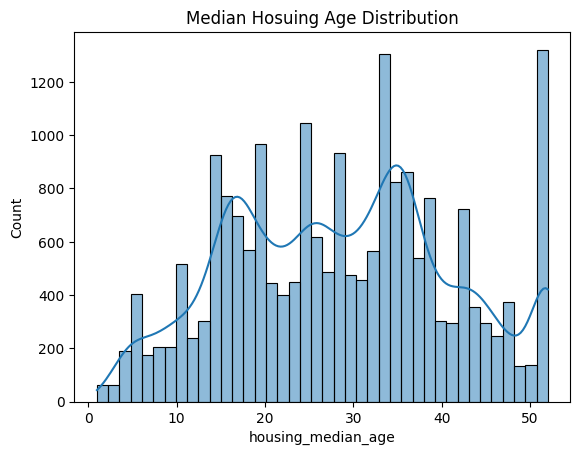

In [14]:
sns.histplot(df[feature2], bins=40, kde=True)
plt.title("Median Hosuing Age Distribution")
plt.show()

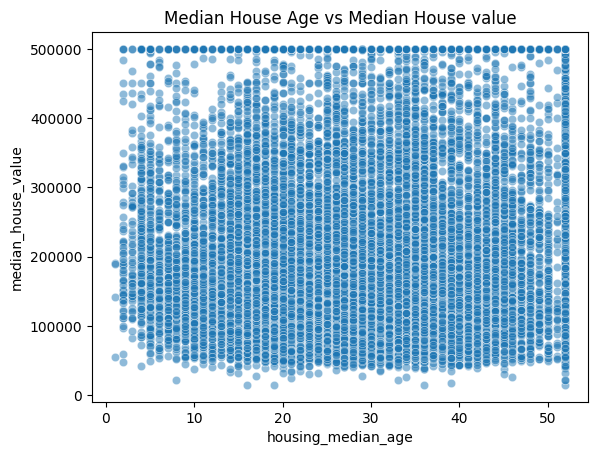

In [15]:
sns.scatterplot(x=df[feature2],
                y=df['median_house_value'],
                alpha=0.5)
plt.title('Median House Age vs Median House value')
plt.show()

In [16]:
df[[feature, 'median_house_value']].corr()

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


-------

## Population

In [17]:
feature3 = 'population'
df[feature3].dtype, df[feature3].isna().sum()

(dtype('float64'), np.int64(0))

In [18]:
df[feature3].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

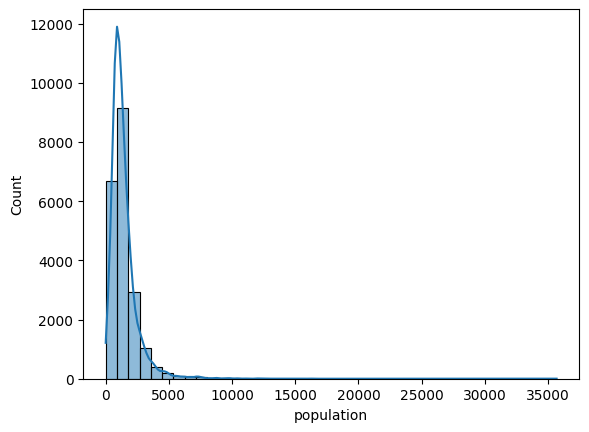

In [19]:
sns.histplot(df[feature3], bins=40, kde=True)
plt.show()

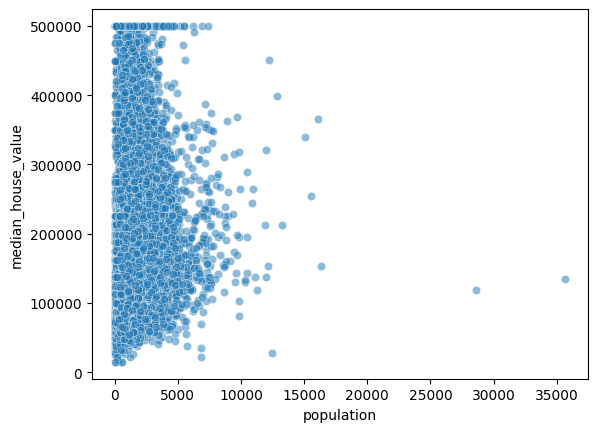

In [20]:
sns.scatterplot(x=df[feature3],
                y=df['median_house_value'],
                alpha=0.5)
plt.show()

In [21]:
df[[feature3, 'median_house_value']].corr()

,population,median_house_value
population,1.00000,-0.02465
median_house_value,-0.02465,1.00000


---

## Total Rooms and Total Bedrooms

In [22]:
feature4 = 'total_rooms'
feature5 = 'total_bedrooms'

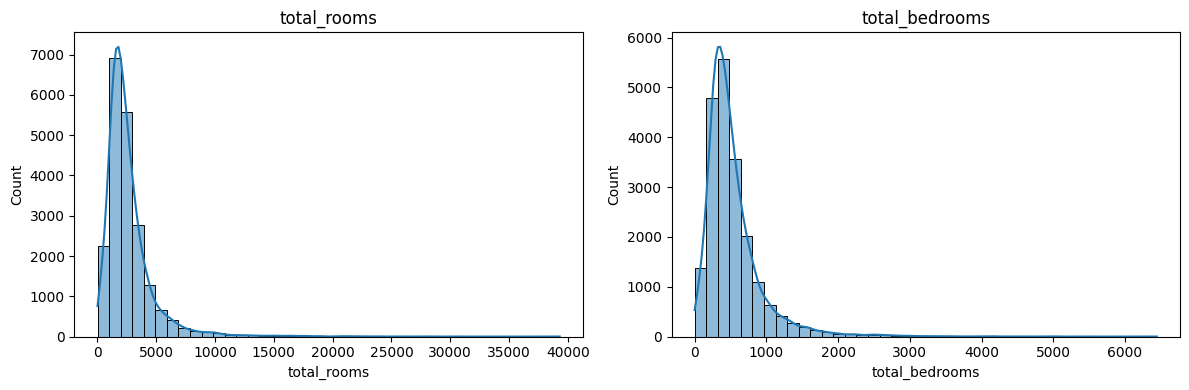

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[feature4], bins=40, kde=True, ax=axes[0])
axes[0].set_title(feature4)

sns.histplot(df[feature5], bins=40, kde=True, ax=axes[1])
axes[1].set_title(feature5)

plt.tight_layout()
plt.show()

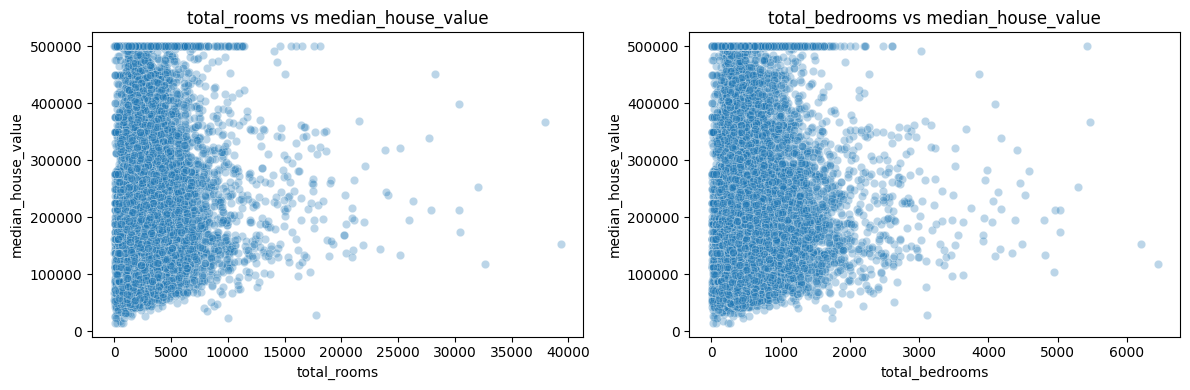

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(
    x=df[feature4],
    y=df["median_house_value"],
    alpha=0.3,
    ax=axes[0]
)
axes[0].set_title(f"{feature4} vs median_house_value")

sns.scatterplot(
    x=df[feature5],
    y=df["median_house_value"],
    alpha=0.3,
    ax=axes[1]
)
axes[1].set_title(f"{feature5} vs median_house_value")

plt.tight_layout()
plt.show()

---

## Latituede and Longitude

In [25]:
feature6 = 'latitude'
feature7 = 'longitude'

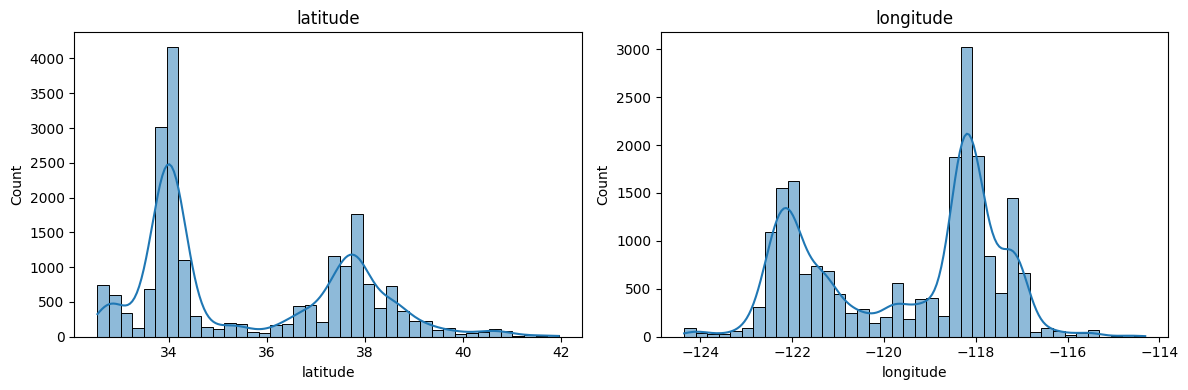

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[feature6], bins=40, kde=True, ax=axes[0])
axes[0].set_title(feature6)

sns.histplot(df[feature7], bins=40, kde=True, ax=axes[1])
axes[1].set_title(feature7)

plt.tight_layout()
plt.show()

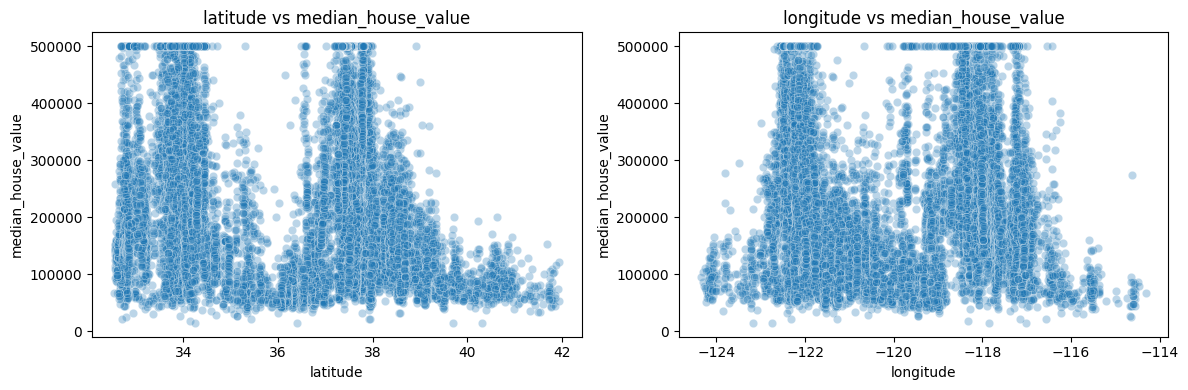

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(
    x=df[feature6],
    y=df["median_house_value"],
    alpha=0.3,
    ax=axes[0]
)
axes[0].set_title(f"{feature6} vs median_house_value")

sns.scatterplot(
    x=df[feature7],
    y=df["median_house_value"],
    alpha=0.3,
    ax=axes[1]
)
axes[1].set_title(f"{feature7} vs median_house_value")

plt.tight_layout()
plt.show()

---

## Ocean Proximity

In [28]:
feature8 = 'ocean_proximity'

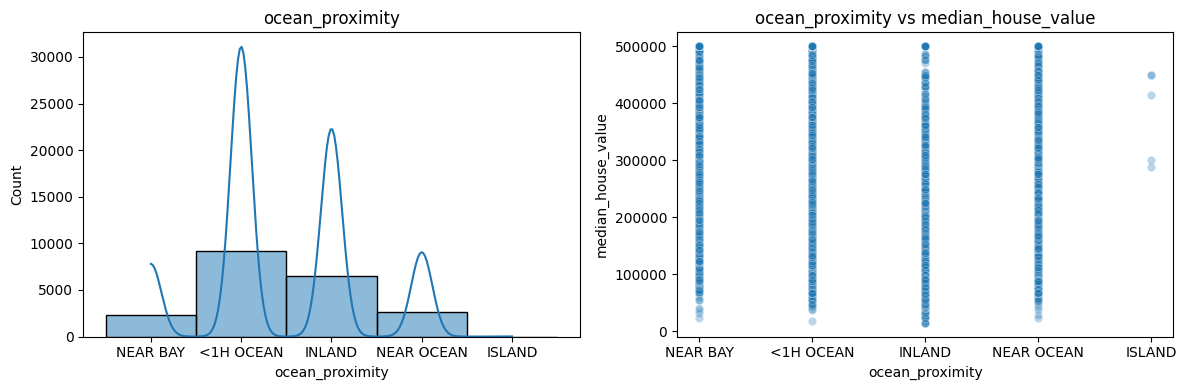

<Figure size 640x480 with 0 Axes>

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[feature8], bins=40, kde=True, ax=axes[0])
axes[0].set_title(feature8)

sns.scatterplot(
    x=df[feature8],
    y=df["median_house_value"],
    alpha=0.3,
    ax=axes[1]
)
axes[1].set_title(f"{feature8} vs median_house_value")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

---